In [1]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

In [46]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

train_dataset = MNIST('', train=True, download=True,transform=img_transform)
test_dataset = MNIST('', train=False, download=True,transform=img_transform)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)


In [48]:
for img, class_ in train_dataloader:
    print(img.shape, class_.shape)
    break

torch.Size([16, 1, 28, 28]) torch.Size([16])


In [83]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

In [81]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [82]:
model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [91]:
for epoch in range(10):
    for data in train_dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, 50, loss.item()))
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, 'image_{}.png'.format(epoch))

epoch [1/50], loss:0.2153
epoch [2/50], loss:0.2177
epoch [3/50], loss:0.2130
epoch [4/50], loss:0.2163
epoch [5/50], loss:0.2132
epoch [6/50], loss:0.2132
epoch [7/50], loss:0.2165
epoch [8/50], loss:0.2194
epoch [9/50], loss:0.2172
epoch [10/50], loss:0.2108


torch.Size([16, 1, 28, 28])
torch.Size([16, 784])
torch.Size([16, 784]) torch.Size([784])


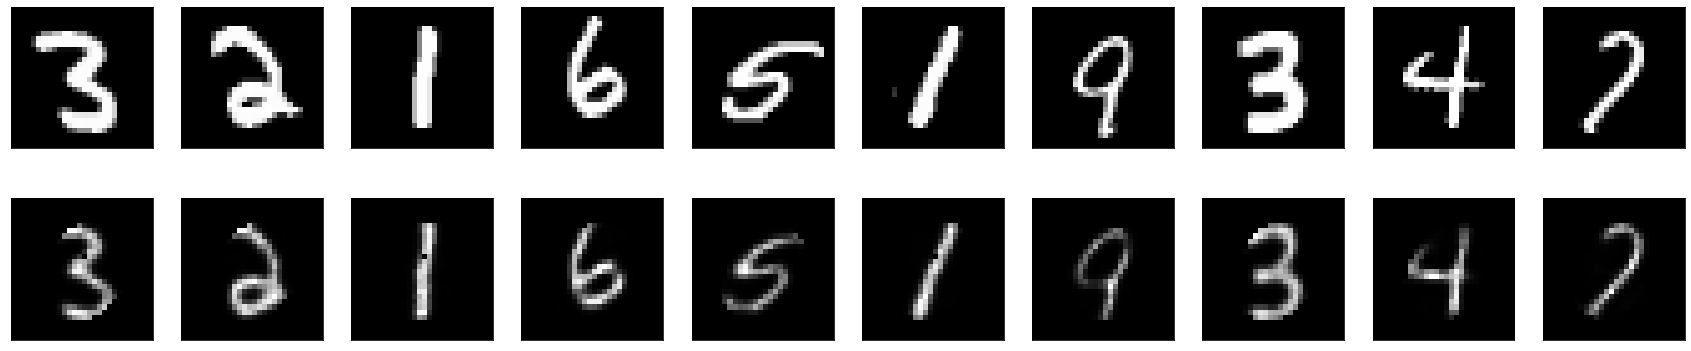

In [115]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

    
img, _ = next(iter(test_dataloader))
print(img.shape)
img=img.view(img.size(0),-1)
img=Variable(img).cuda()
preds = model(img)
print(preds.shape)
pic = to_img(preds.cpu().data)

preds=preds.cpu()
print(preds.shape, preds[0].shape)


n = 10  # how many digits we will display
plt.figure(figsize=(30, 10))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(img[i].cpu().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(preds[i].detach().numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


### Sigmoid to Tanh

In [116]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [118]:
model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

for epoch in range(10):
    for data in train_dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, 50, loss.item()))
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, 'image_{}.png'.format(epoch))

epoch [1/50], loss:0.0087
epoch [2/50], loss:0.0086
epoch [3/50], loss:0.0086
epoch [4/50], loss:0.0102
epoch [5/50], loss:0.0119
epoch [6/50], loss:0.0090
epoch [7/50], loss:0.0107
epoch [8/50], loss:0.0101
epoch [9/50], loss:0.0097
epoch [10/50], loss:0.0085


torch.Size([16, 1, 28, 28])
torch.Size([16, 784])
torch.Size([16, 784]) torch.Size([784])


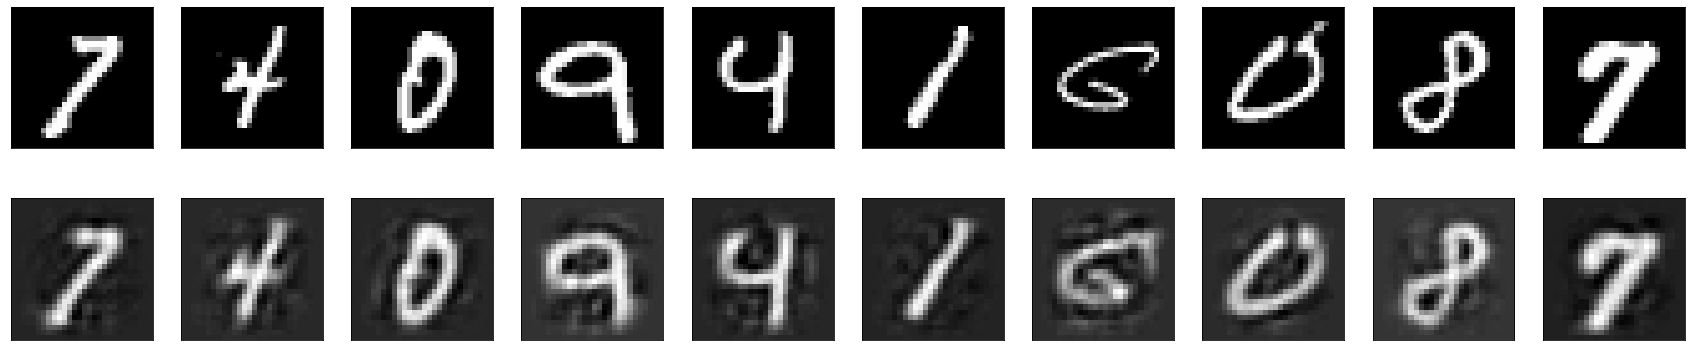

In [119]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

    
img, _ = next(iter(test_dataloader))
print(img.shape)
img=img.view(img.size(0),-1)
img=Variable(img).cuda()
preds = model(img)
print(preds.shape)
pic = to_img(preds.cpu().data)

preds=preds.cpu()
print(preds.shape, preds[0].shape)


n = 10  # how many digits we will display
plt.figure(figsize=(30, 10))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(img[i].cpu().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(preds[i].detach().numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)